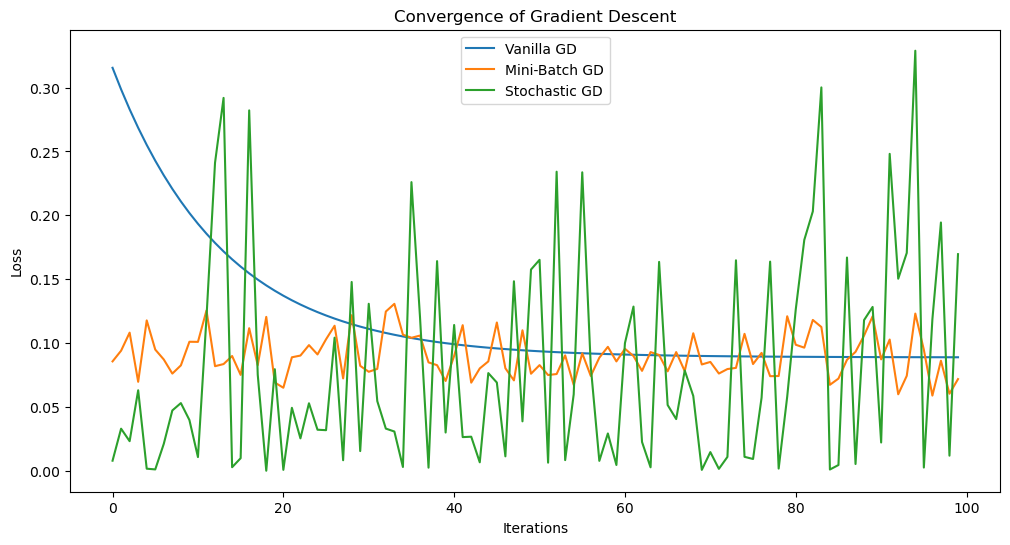

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset with 1500 samples and 15 features (you can replace this with your actual data)
np.random.seed(0)
num_samples = 1500
num_features = 15
X = np.random.rand(num_samples, num_features)
y = np.random.rand(num_samples)

# Define the learning rate and the number of iterations
learning_rate = 0.01
num_iterations = 100

# Initialize the weights (coefficients) with zeros
weights = np.zeros(num_features)

# Lists to store the loss for each version of gradient descent
loss_vanilla = []
loss_mini_batch = []
loss_stochastic = []

# Vanilla Gradient Descent
for i in range(num_iterations):
    y_pred = np.dot(X, weights)
    gradient = -(1/num_samples) * np.dot(X.T, (y - y_pred))
    weights -= learning_rate * gradient
    loss = np.mean((y - y_pred)**2)
    loss_vanilla.append(loss)

# Mini-Batch Gradient Descent
batch_size = 32  # Adjust the batch size based on experimentation
for i in range(num_iterations):
    random_indices = np.random.choice(num_samples, batch_size, replace=False)
    X_batch = X[random_indices]
    y_batch = y[random_indices]
    y_pred = np.dot(X_batch, weights)
    gradient = -(1/batch_size) * np.dot(X_batch.T, (y_batch - y_pred))
    weights -= learning_rate * gradient
    loss = np.mean((y_batch - y_pred)**2)
    loss_mini_batch.append(loss)

# Stochastic Gradient Descent
for i in range(num_iterations):
    random_index = np.random.randint(num_samples)
    x_sample = X[random_index]
    y_sample = y[random_index]
    y_pred = np.dot(x_sample, weights)
    gradient = -(y_sample - y_pred) * x_sample
    weights -= learning_rate * gradient
    loss = (y_sample - y_pred)**2
    loss_stochastic.append(loss)

# Plot the loss for each version of gradient descent
plt.figure(figsize=(12, 6))
plt.plot(loss_vanilla, label='Vanilla GD')
plt.plot(loss_mini_batch, label='Mini-Batch GD')
plt.plot(loss_stochastic, label='Stochastic GD')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Convergence of Gradient Descent')
plt.show()

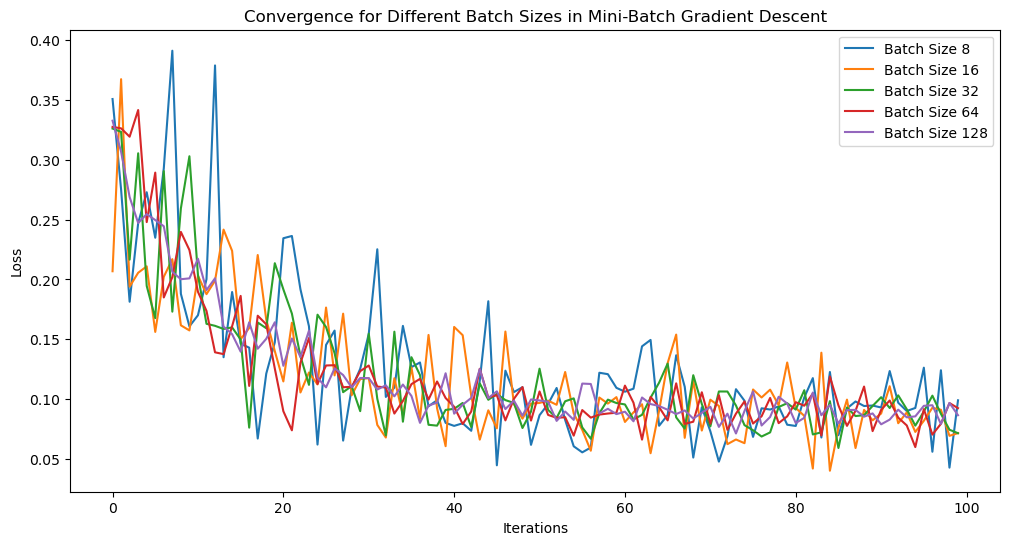

In [2]:
import numpy as np

# Generate a synthetic dataset with 1500 samples and 15 features (you can replace this with your actual data)
np.random.seed(0)
num_samples = 1500
num_features = 15
X = np.random.rand(num_samples, num_features)
y = np.random.rand(num_samples)

# Define the learning rate and the number of iterations
learning_rate = 0.01
num_iterations = 100

# Initialize the weights (coefficients) with zeros
weights = np.zeros(num_features)

# Lists to store the loss for each version of gradient descent
loss_vanilla = []
loss_mini_batch = []
loss_stochastic = []

# Vanilla Gradient Descent
for i in range(num_iterations):
    y_pred = np.dot(X, weights)
    gradient = -(1/num_samples) * np.dot(X.T, (y - y_pred))
    weights -= learning_rate * gradient
    loss = np.mean((y - y_pred)**2)
    loss_vanilla.append(loss)

# Mini-Batch Gradient Descent
batch_size = 32  # Adjust the batch size based on experimentation
for i in range(num_iterations):
    random_indices = np.random.choice(num_samples, batch_size, replace=False)
    X_batch = X[random_indices]
    y_batch = y[random_indices]
    y_pred = np.dot(X_batch, weights)
    gradient = -(1/batch_size) * np.dot(X_batch.T, (y_batch - y_pred))
    weights -= learning_rate * gradient
    loss = np.mean((y_batch - y_pred)**2)
    loss_mini_batch.append(loss)

# Stochastic Gradient Descent
for i in range(num_iterations):
    random_index = np.random.randint(num_samples)
    x_sample = X[random_index]
    y_sample = y[random_index]
    y_pred = np.dot(x_sample, weights)
    gradient = -(y_sample - y_pred) * x_sample
    weights -= learning_rate * gradient
    loss = (y_sample - y_pred)**2
    loss_stochastic.append(loss)

# Experiment to find the optimal batch size for Mini-Batch Gradient Descent
# You can plot the loss for different batch sizes and choose the one that converges well
import matplotlib.pyplot as plt

batch_sizes = [8, 16, 32, 64, 128]
losses = []

for batch_size in batch_sizes:
    weights = np.zeros(num_features)
    batch_loss = []
    for i in range(num_iterations):
        random_indices = np.random.choice(num_samples, batch_size, replace=False)
        X_batch = X[random_indices]
        y_batch = y[random_indices]
        y_pred = np.dot(X_batch, weights)
        gradient = -(1/batch_size) * np.dot(X_batch.T, (y_batch - y_pred))
        weights -= learning_rate * gradient
        loss = np.mean((y_batch - y_pred)**2)
        batch_loss.append(loss)
    losses.append(batch_loss)

# Plot the loss for different batch sizes
plt.figure(figsize=(12, 6))
for i, batch_size in enumerate(batch_sizes):
    plt.plot(losses[i], label=f'Batch Size {batch_size}')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Convergence for Different Batch Sizes in Mini-Batch Gradient Descent')
plt.show()

In [3]:
import numpy as np

# Generate a synthetic dataset with 1500 samples and 15 features (you can replace this with your actual data)
np.random.seed(0)
num_samples = 1500
num_features = 15
X = np.random.rand(num_samples, num_features)
y = np.random.rand(num_samples)

# Define the cost function J(theta) and its gradient
def cost_function(theta):
    y_pred = np.dot(X, theta)
    return np.mean((y - y_pred) ** 2)

def gradient(theta):
    y_pred = np.dot(X, theta)
    return -(2 / num_samples) * np.dot(X.T, (y - y_pred))

# Line Search Methods

def bisection_line_search(theta, direction, max_iter=100, epsilon=1e-5):
    a = 0.0
    b = 1.0
    for _ in range(max_iter):
        alpha = (a + b) / 2
        left_point = cost_function(theta - alpha * direction)
        right_point = cost_function(theta - b * direction)
        if left_point < right_point:
            b = alpha
        else:
            a = alpha
        if (b - a) < epsilon:
            break
    return (a + b) / 2

def golden_section_line_search(theta, direction, max_iter=100, epsilon=1e-5):
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio
    a = 0.0
    b = 1.0
    x1 = a + (b - a) / phi
    x2 = b - (b - a) / phi

    for _ in range(max_iter):
        if cost_function(theta - x1 * direction) < cost_function(theta - x2 * direction):
            b = x2
            x2 = x1
            x1 = a + (b - a) / phi
        else:
            a = x1
            x1 = x2
            x2 = b - (b - a) / phi
        if (b - a) < epsilon:
            break
    return (a + b) / 2

def armijo_rule_line_search(theta, direction, max_iter=100, epsilon=1e-5, alpha=1.0, beta=0.5):
    for _ in range(max_iter):
        cost_current = cost_function(theta)
        cost_next = cost_function(theta - alpha * direction)
        if cost_next <= cost_current - beta * alpha * np.dot(gradient(theta), direction):
            return alpha
        alpha *= 0.5
    return alpha

# Example usage:
initial_theta = np.zeros(num_features)
grad = gradient(initial_theta)

# Perform line search using different methods
optimal_step_bisection = bisection_line_search(initial_theta, -grad)
optimal_step_golden = golden_section_line_search(initial_theta, -grad)
optimal_step_armijo = armijo_rule_line_search(initial_theta, -grad)

print("Optimal Step Size (Bisection):", optimal_step_bisection)
print("Optimal Step Size (Golden Section):", optimal_step_golden)
print("Optimal Step Size (Armijo Rule):", optimal_step_armijo)

Optimal Step Size (Bisection): 3.814697265625e-06
Optimal Step Size (Golden Section): 0.7236046410902137
Optimal Step Size (Armijo Rule): 6.938893903907228e-18


In [4]:
import numpy as np

# Generate a synthetic dataset with 1500 samples and 15 features (you can replace this with your actual data)
np.random.seed(0)
num_samples = 1500
num_features = 15
X = np.random.rand(num_samples, num_features)
y = np.random.rand(num_samples)

# Define the cost function J(theta) and its gradient
def cost_function(theta):
    y_pred = np.dot(X, theta)
    return np.mean((y - y_pred) ** 2)

def gradient(theta):
    y_pred = np.dot(X, theta)
    return -(2 / num_samples) * np.dot(X.T, (y - y_pred))

# Line Search Methods

def bisection_line_search(theta, direction, max_iter=100, epsilon=1e-5):
    a = 0.0
    b = 1.0
    for _ in range(max_iter):
        alpha = (a + b) / 2
        left_point = cost_function(theta - alpha * direction)
        right_point = cost_function(theta - b * direction)
        if left_point < right_point:
            b = alpha
        else:
            a = alpha
        if (b - a) < epsilon:
            break
    return (a + b) / 2

def golden_section_line_search(theta, direction, max_iter=100, epsilon=1e-5):
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio
    a = 0.0
    b = 1.0
    x1 = a + (b - a) / phi
    x2 = b - (b - a) / phi

    for _ in range(max_iter):
        if cost_function(theta - x1 * direction) < cost_function(theta - x2 * direction):
            b = x2
            x2 = x1
            x1 = a + (b - a) / phi
        else:
            a = x1
            x1 = x2
            x2 = b - (b - a) / phi
        if (b - a) < epsilon:
            break
    return (a + b) / 2

def armijo_rule_line_search(theta, direction, max_iter=100, epsilon=1e-5, alpha=1.0, beta=0.5):
    for _ in range(max_iter):
        cost_current = cost_function(theta)
        cost_next = cost_function(theta - alpha * direction)
        if cost_next <= cost_current - beta * alpha * np.dot(gradient(theta), direction):
            return alpha
        alpha *= 0.5
    return alpha

# Gradient Descent with Line Search
def gradient_descent_with_line_search(initial_theta, max_iterations=100):
    theta = initial_theta.copy()
    for _ in range(max_iterations):
        grad = gradient(theta)
        
        # Use Line Search to find the optimal step size
        step_size_bisection = bisection_line_search(theta, -grad)
        step_size_golden = golden_section_line_search(theta, -grad)
        step_size_armijo = armijo_rule_line_search(theta, -grad)
        
        # Update parameters using the optimal step size
        theta -= step_size_armijo * grad  # You can choose any of the step sizes here
        
        # Calculate and print the cost at each iteration
        cost = cost_function(theta)
        print(f"Iteration {_ + 1}/{max_iterations}, Cost: {cost}")
    
    return theta

# Example usage:
initial_theta = np.zeros(num_features)
final_theta = gradient_descent_with_line_search(initial_theta, max_iterations=50)


Iteration 1/50, Cost: 0.31545159557096375
Iteration 2/50, Cost: 0.3154515955709637
Iteration 3/50, Cost: 0.3154515955709636
Iteration 4/50, Cost: 0.3154515955709636
Iteration 5/50, Cost: 0.3154515955709635
Iteration 6/50, Cost: 0.3154515955709635
Iteration 7/50, Cost: 0.3154515955709635
Iteration 8/50, Cost: 0.31545159557096336
Iteration 9/50, Cost: 0.31545159557096336
Iteration 10/50, Cost: 0.31545159557096336
Iteration 11/50, Cost: 0.31545159557096336
Iteration 12/50, Cost: 0.31545159557096336
Iteration 13/50, Cost: 0.31545159557096314
Iteration 14/50, Cost: 0.3154515955709631
Iteration 15/50, Cost: 0.3154515955709631
Iteration 16/50, Cost: 0.3154515955709631
Iteration 17/50, Cost: 0.3154515955709631
Iteration 18/50, Cost: 0.3154515955709631
Iteration 19/50, Cost: 0.3154515955709631
Iteration 20/50, Cost: 0.31545159557096303
Iteration 21/50, Cost: 0.31545159557096303
Iteration 22/50, Cost: 0.31545159557096303
Iteration 23/50, Cost: 0.315451595570963
Iteration 24/50, Cost: 0.315451595

In [5]:
import numpy as np

# Generate a synthetic dataset with 1500 samples and 15 features (you can replace this with your actual data)
np.random.seed(0)
num_samples = 1500
num_features = 15
X = np.random.rand(num_samples, num_features)
y = np.random.rand(num_samples)

# Define the cost function J(theta) and its gradient
def cost_function(theta):
    y_pred = np.dot(X, theta)
    return np.mean((y - y_pred) ** 2)

def gradient(theta):
    y_pred = np.dot(X, theta)
    return -(2 / num_samples) * np.dot(X.T, (y - y_pred))

# Line Search Methods

def bisection_line_search(theta, direction, max_iter=100, epsilon=1e-5):
    a = 0.0
    b = 1.0
    for _ in range(max_iter):
        alpha = (a + b) / 2
        left_point = cost_function(theta - alpha * direction)
        right_point = cost_function(theta - b * direction)
        if left_point < right_point:
            b = alpha
        else:
            a = alpha
        if (b - a) < epsilon:
            break
    return (a + b) / 2

def golden_section_line_search(theta, direction, max_iter=100, epsilon=1e-5):
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio
    a = 0.0
    b = 1.0
    x1 = a + (b - a) / phi
    x2 = b - (b - a) / phi

    for _ in range(max_iter):
        if cost_function(theta - x1 * direction) < cost_function(theta - x2 * direction):
            b = x2
            x2 = x1
            x1 = a + (b - a) / phi
        else:
            a = x1
            x1 = x2
            x2 = b - (b - a) / phi
        if (b - a) < epsilon:
            break
    return (a + b) / 2

def armijo_rule_line_search(theta, direction, max_iter=100, epsilon=1e-5, alpha=1.0, beta=0.5):
    for _ in range(max_iter):
        cost_current = cost_function(theta)
        cost_next = cost_function(theta - alpha * direction)
        if cost_next <= cost_current - beta * alpha * np.dot(gradient(theta), direction):
            return alpha
        alpha *= 0.5
    return alpha

# Gradient Descent with Line Search

def gradient_descent_with_line_search(initial_theta, max_iterations=100, line_search_method=None):
    theta = initial_theta.copy()
    for iteration in range(max_iterations):
        grad = gradient(theta)

        if line_search_method == "bisection":
            step_size = bisection_line_search(theta, -grad)
        elif line_search_method == "golden_section":
            step_size = golden_section_line_search(theta, -grad)
        elif line_search_method == "armijo":
            step_size = armijo_rule_line_search(theta, -grad)
        else:
            step_size = 0.01  # Default constant step size

        theta -= step_size * grad

        # Calculate and print the cost at each iteration
        cost = cost_function(theta)
        print(f"Iteration {iteration + 1}/{max_iterations}, Cost: {cost}")

    return theta

# Example usage to compare line search methods
initial_theta = np.zeros(num_features)

print("\nUsing Bisection Line Search:")
theta_bisection = gradient_descent_with_line_search(initial_theta, max_iterations=50, line_search_method="bisection")

print("\nUsing Golden Section Line Search:")
theta_golden_section = gradient_descent_with_line_search(initial_theta, max_iterations=50, line_search_method="golden_section")

print("\nUsing Armijo Rule Line Search:")
theta_armijo_rule = gradient_descent_with_line_search(initial_theta, max_iterations=50, line_search_method="armijo")



Using Bisection Line Search:
Iteration 1/50, Cost: 0.3154384727304829
Iteration 2/50, Cost: 0.3154253506499793
Iteration 3/50, Cost: 0.3154122293294088
Iteration 4/50, Cost: 0.31539910876872757
Iteration 5/50, Cost: 0.3153859889678914
Iteration 6/50, Cost: 0.3153728699268565
Iteration 7/50, Cost: 0.3153597516455786
Iteration 8/50, Cost: 0.31534663412401387
Iteration 9/50, Cost: 0.3153335173621183
Iteration 10/50, Cost: 0.3153204013598479
Iteration 11/50, Cost: 0.31530728611715864
Iteration 12/50, Cost: 0.3152941716340065
Iteration 13/50, Cost: 0.31528105791034755
Iteration 14/50, Cost: 0.3152679449461378
Iteration 15/50, Cost: 0.3152548327413332
Iteration 16/50, Cost: 0.31524172129588984
Iteration 17/50, Cost: 0.3152286106097637
Iteration 18/50, Cost: 0.31521550068291077
Iteration 19/50, Cost: 0.3152023915152872
Iteration 20/50, Cost: 0.3151892831068489
Iteration 21/50, Cost: 0.3151761754575519
Iteration 22/50, Cost: 0.3151630685673523
Iteration 23/50, Cost: 0.315149962436206
Iteratio